In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
import streamlit as st

train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")


In [2]:
# 1. Data Exploration

# Display basic info
print(train_df.info())
print(test_df.info())

# Show the first few rows
print(train_df.head())
print(test_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [3]:
#2 datasets Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [4]:
# Load the datasets (assuming they are in the same directory as the notebook)
try:
    df_test = pd.read_csv('Titanic_test.csv')
    df_train = pd.read_csv('Titanic_train.csv')
except FileNotFoundError:
    print("Error: Titanic_test.csv or Titanic_train.csv not found. Please upload the files.")

# 1. Data Exploration (Partial - Adapt as needed)
# Combine train and test for preprocessing, then split later
df = pd.concat([df_train, df_test], ignore_index=True)

# Examine features, types, and summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None
       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.02006

In [5]:
# 2. Data Preprocessing
# Handle Missing Values (Example - fill with median for age, mode for Embarked)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Surbhi\AppData\Local\Temp\ipykernel_15260\1120441441.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Surbhi\AppData\Local\Temp\ipykernel_15260\1120441441.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [6]:
# Encode Categorical Features
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    df[col] = le.fit_transform(df[col])


In [7]:
# Feature Engineering (Example - create a family size feature)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Drop irrelevant columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
# Split back into train and test
df_train = df[df['Survived'].notna()]
df_test = df[df['Survived'].isna()]

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 3. Model Building
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# 4. Model Evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC Score: {roc_auc}')


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-Score: 0.7638888888888888
ROC-AUC Score: 0.8001930501930502


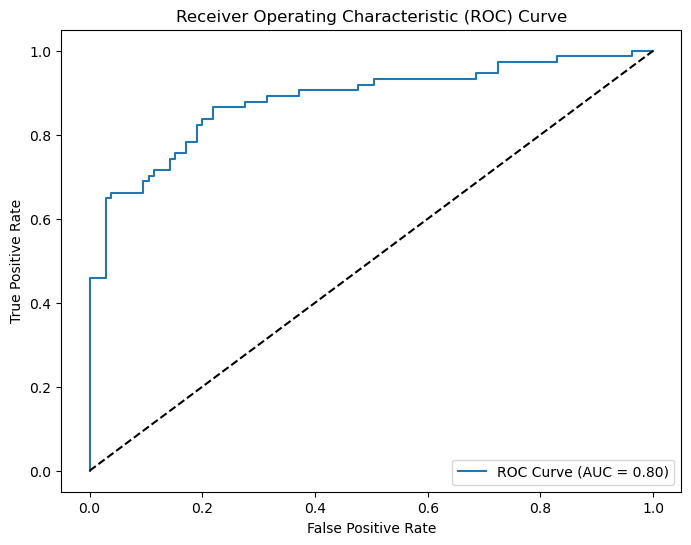

In [11]:
# prompt: (rest of the code, including ROC curve visualization, interpretation, and Streamlit deployment)

# 5. ROC Curve Visualization
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [12]:
 # 7. Streamlit Deployment 
# # !pip install streamlit
# # import streamlit as st

!pip install streamlit

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Function to preprocess user input
def preprocess_input(user_input):
    # Create a DataFrame from user input (mimic the structure of your training data)
    input_df = pd.DataFrame([user_input])

    # Preprocessing steps (MUST match training preprocessing EXACTLY)
    input_df['Age'].fillna(df['Age'].median(), inplace=True)  



    le = LabelEncoder()
    for col in ['Sex', 'Embarked']:
        input_df[col] = le.fit_transform(input_df[col])

    # Feature Engineering (must match training exactly)
    input_df['FamilySize'] = input_df['SibSp'] + input_df['Parch'] + 1
    
    # Drop irrelevant columns (must match training exactly)
    input_df = input_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

    # Ensure consistent column order (essential!)
    input_df = input_df[X_train.columns] # X_train is your training features

    return input_df



In [13]:
# Streamlit app
st.title("Titanic Survival Prediction")

# Create input fields for user features
pclass = st.selectbox("Pclass", [1, 2, 3])
sex = st.selectbox("Sex", ["male", "female"])
age = st.number_input("Age", min_value=0, max_value=100, value=30)
sibsp = st.number_input("Siblings/Spouses Aboard", min_value=0, value=0)
parch = st.number_input("Parents/Children Aboard", min_value=0, value=0)
fare = st.number_input("Fare", min_value=0.0, value=10.0)
embarked = st.selectbox("Embarked", ["C", "Q", "S"])

# User input dictionary
user_input = {
    'Pclass': pclass,
    'Sex': sex,
    'Age': age,
    'SibSp': sibsp,
    'Parch': parch,
    'Fare': fare,
    'Embarked': embarked
}



2025-02-21 10:57:32.172 
  command:

    streamlit run C:\Users\Surbhi\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [31]:
# Make prediction when the user clicks the button
if st.button("Predict"):
    input_df = preprocess_input(user_input)
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0, 1] # Probability of survival
    
    if prediction == 1:
        st.success(f"Passenger survival prediction: Survived (Probability: {probability:.2f})")
    else:
        st.error(f"Passenger survival prediction: Did not survive (Probability: {probability:.2f})")

1. What is the difference between precision and recall?

Precision and recall are two key metrics used to evaluate classification models, especially in imbalanced datasets.

    Precision measures how many of the predicted positive instances are actually positive. It is defined as:
    Precision=True Positives (TP)True Positives (TP)+False Positives (FP)
    Precision=True Positives (TP)+False Positives (FP)True Positives (TP)​
        A high precision means that when the model predicts positive, it is usually correct.
        It is important in scenarios where false positives are costly (e.g., spam detection, where incorrectly marking an important email as spam is bad).

    Recall measures how many of the actual positive instances are correctly identified by the model. It is defined as:
    Recall=True Positives (TP)True Positives (TP)+False Negatives (FN)
    Recall=True Positives (TP)+False Negatives (FN)True Positives (TP)​
        A high recall means the model detects most of the actual positives.
        It is important in scenarios where false negatives are costly (e.g., medical diagnosis, where missing a disease could have severe consequences).

Example:

    If a spam filter has high precision but low recall, it only marks emails as spam when it is very confident, but it may miss many actual spam emails.
    If it has high recall but low precision, it marks almost all spam emails correctly but may also misclassify many legitimate emails as spam.

2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple training and validation subsets. The most common type is k-fold cross-validation, where:

    The dataset is divided into k equal parts (folds).
    The model is trained on k-1 folds and tested on the remaining fold.
    This process is repeated k times, with each fold serving as a test set once.
    The final performance is the average of all k test results.

Why is cross-validation important?

    Reduces overfitting: By testing the model on multiple unseen portions of the data, we get a better estimate of how it will perform on new data.
    Ensures robustness: Instead of relying on a single train-test split, cross-validation provides a more reliable performance estimate.
    Works well with small datasets: When data is limited, cross-validation ensures that more data is used for training while still allowing evaluation.

In binary classification, cross-validation helps to:

    Assess the model’s ability to handle class imbalance.
    Tune hyperparameters without overfitting.
    Get a more stable performance estimate compared to a single train-test split.